# Peetz Post-Process
## Cleaned data import, further classification, and results presentation

In [1]:
import sys, os
import pickle
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# import statsmodels.api as sm

In [2]:
# path='/projects/jasi4471/peetz/'

# with open('./post_QC_data_ID60.pkl', "rb") as fh:
#     post_QC_data_ID60 = pickle.load(fh)

# with open('./post_QC_data_ID61.pkl', "rb") as fh:
#     post_QC_data_ID61 = pickle.load(fh)
    
# with open('./post_QC_data_ID68.pkl', "rb") as fh:
#     post_QC_data_ID68 = pickle.load(fh)
    
# with open('./post_QC_data_ID72.pkl', "rb") as fh:
#     post_QC_data_ID72 = pickle.load(fh)
    
# with open('./post_QC_data_ID78.pkl', "rb") as fh:
#     post_QC_data_ID78 = pickle.load(fh)
    
# with open('./post_QC_data_ID82.pkl', "rb") as fh:
#     post_QC_data_ID82 = pickle.load(fh)
    
# with open('./post_QC_data_ID83.pkl', "rb") as fh:
#     post_QC_data_ID83 = pickle.load(fh)
    
# with open('./post_QC_data_ID84.pkl', "rb") as fh:
#     post_QC_data_ID84 = pickle.load(fh)
    
# with open('./post_QC_data_ID85.pkl', "rb") as fh:
#     post_QC_data_ID85 = pickle.load(fh)
    
# with open('./post_QC_data_ID86.pkl', "rb") as fh:
#     post_QC_data_ID86 = pickle.load(fh)
    
# with open('./post_QC_data_ID87.pkl', "rb") as fh:
#     post_QC_data_ID87 = pickle.load(fh)
    
# with open('./post_QC_data_ID88.pkl', "rb") as fh:
#     post_QC_data_ID88 = pickle.load(fh)
    
# with open('./post_QC_data_ID89.pkl', "rb") as fh:
#     post_QC_data_ID89 = pickle.load(fh)
    
# post_QC_data_ID89.keys()

In [3]:
# post_QC_data_v17 = {}

# all_IDs = [post_QC_data_ID60,post_QC_data_ID61,post_QC_data_ID68,post_QC_data_ID72,
#            post_QC_data_ID78,post_QC_data_ID82,post_QC_data_ID83,post_QC_data_ID84,
#            post_QC_data_ID85,post_QC_data_ID86,post_QC_data_ID87,post_QC_data_ID88,
#            post_QC_data_ID89]

# all_keys = post_QC_data_ID60.keys()

# for key in all_keys:
#     df = all_IDs[0][key].copy()

#     all_types = type(post_QC_data_ID60[key])

#     if all_types == pd.core.frame.DataFrame:
#         df = all_IDs[0][key].copy()
#         for i in range(1,13):
#             df = pd.concat((df,all_IDs[i][key].copy()), axis=1)

#     else:
#         df = all_IDs[0][key].copy()
#         for i in range(1,13):
#             df = df+all_IDs[i][key].copy()

#     post_QC_data_v17[key]=df.copy()

# post_QC_data_v17

# output = open('./post_QC_data_v17.pkl', 'wb')
# pickle.dump(post_QC_data_v17, output)
# output.close()

In [4]:
path='/projects/jasi4471/peetz/'

with open('./post_QC_data_v17.pkl', "rb") as fh:  ### For testing
# with open('./post_QC_data_v17.pkl', "rb") as fh:
    post_QC_data = pickle.load(fh)
    
post_QC_data.keys()

dict_keys(['AWS_Vr_mat', 'WD_Vr_mat', 'CL_Vr_mat', 'WW_Vr_mat', 'AWS_Va_mat', 'WD_Va_mat', 'CL_Va_mat', 'WW_Va_mat', 'nrange2', 'ws_WC_80m', 'wd_WC_80m', 'ws_60m', 'wd_60m', 'yaw_offset_mean_list', 'yaw_offset_std_list', 'yaw_vane_mean_list', 'yaw_vane_std_list', 'scan_midtime_list', 'TI_60m_list', 'Obukhov_length_10m_list', 'RMSE_Vr_mat', 'RMSE_Va_mat', 'Dif_Vr_mat', 'Dif_Va_mat', 'Dif_max_Vr_list', 'Dif_max_Va_list', 'Steering_status_list'])

## 1-D (time-history) data

In [5]:
stats = pd.DataFrame({
    'Diff Max': post_QC_data['Dif_max_Va_list'],
})
stats.index.name = 'time'

conditions = pd.DataFrame({
    'ws_WC_80m': post_QC_data['ws_WC_80m'],
    'wd_WC_80m': post_QC_data['wd_WC_80m'],
    'ws_60m': post_QC_data['ws_60m'],
    'wd_60m': post_QC_data['wd_60m'],
    'yaw_offset_mean_target': post_QC_data['yaw_offset_mean_list'],
    'yaw_offset_std_target': post_QC_data['yaw_offset_std_list'],
    'yaw_vane_mean': post_QC_data['yaw_vane_mean_list'],
    'yaw_vane_std': post_QC_data['yaw_vane_std_list'],
    'steering_status': post_QC_data['Steering_status_list'],
    'TI_60m': post_QC_data['TI_60m_list'],
    'Obukhov_length_10m':post_QC_data['Obukhov_length_10m_list']
})
conditions.index.name = 'time'

## 2-D (time/range history) data

In [6]:
indices = [np.arange(N) for N in post_QC_data['WD_Va_mat'].T.shape]
multiidx = pd.MultiIndex.from_product(indices, names=['time','range'])

wake_Vr = pd.DataFrame({
    'WD': post_QC_data['WD_Vr_mat'].values.T.flatten(),
    'WW': post_QC_data['WW_Vr_mat'].values.T.flatten(),
    'AWS': post_QC_data['AWS_Vr_mat'].values.T.flatten(),
    'CL': post_QC_data['CL_Vr_mat'].values.T.flatten(),
    'RMSE_Vr': post_QC_data['RMSE_Vr_mat'].values.T.flatten(),
    'Dif_Vr': post_QC_data['Dif_Vr_mat'].values.T.flatten(),
}, index=multiidx)

wake_Va = pd.DataFrame({
    'WD': post_QC_data['WD_Va_mat'].values.T.flatten(),
    'WW': post_QC_data['WW_Va_mat'].values.T.flatten(),
    'AWS': post_QC_data['AWS_Va_mat'].values.T.flatten(),
    'CL': post_QC_data['CL_Va_mat'].values.T.flatten(),
    'RMSE_Va': post_QC_data['RMSE_Va_mat'].values.T.flatten(),
    'Dif_Va': post_QC_data['Dif_Va_mat'].values.T.flatten(),
}, index=multiidx)

# multiindex (long format)
wake_Va=wake_Va.replace(pd.NA, np.nan)
wake_Vr=wake_Vr.replace(pd.NA, np.nan)

# wide format
wake_Va['WD'].unstack()
wake_Vr['WD'].unstack()

wake_Va['WW']=wake_Va['WW']*4
wake_Vr['WW']=wake_Vr['WW']*4

## Apply QC with index, now the index has both the time and range

In [7]:
wake_Va=wake_Va.loc[(wake_Va.WW > 50) | (wake_Va.WW < 200)]
wake_Vr=wake_Vr.loc[(wake_Vr.WW > 50) | (wake_Vr.WW < 200)]

idx = wake_Va.index.get_level_values('time')
wake_Va['Diff Max'] = stats['Diff Max'].loc[idx].values
idx = wake_Vr.index.get_level_values('time')
wake_Vr['Diff Max'] = stats['Diff Max'].loc[idx].values

idx = wake_Va.index.get_level_values('time')
wake_Va['ws_WC_80m'] = conditions['ws_WC_80m'].loc[idx].values
wake_Va['ws_60m'] = conditions['ws_60m'].loc[idx].values
wake_Va['wd_WC_80m'] = conditions['wd_WC_80m'].loc[idx].values
wake_Va['wd_60m'] = conditions['wd_60m'].loc[idx].values
wake_Va['yaw_offset_mean_target'] = conditions['yaw_offset_mean_target'].loc[idx].values
wake_Va['yaw_offset_std_target'] = conditions['yaw_offset_std_target'].loc[idx].values
wake_Va['yaw_vane_mean'] = conditions['yaw_vane_mean'].loc[idx].values
wake_Va['yaw_vane_std'] = conditions['yaw_vane_std'].loc[idx].values
wake_Va['steering_status'] = conditions['steering_status'].loc[idx].values
wake_Va['Obukhov_length_10m'] = conditions['Obukhov_length_10m'].loc[idx].values
wake_Va['TI_60m'] = conditions['TI_60m'].loc[idx].values

idx = wake_Vr.index.get_level_values('time')
wake_Vr['ws_WC_80m'] = conditions['ws_WC_80m'].loc[idx].values
wake_Vr['ws_60m'] = conditions['ws_60m'].loc[idx].values
wake_Vr['wd_WC_80m'] = conditions['wd_WC_80m'].loc[idx].values
wake_Vr['wd_60m'] = conditions['wd_60m'].loc[idx].values
wake_Vr['yaw_offset_mean_target'] = conditions['yaw_offset_mean_target'].loc[idx].values
wake_Vr['yaw_offset_std_target'] = conditions['yaw_offset_std_target'].loc[idx].values
wake_Vr['yaw_vane_mean'] = conditions['yaw_vane_mean'].loc[idx].values
wake_Vr['yaw_vane_std'] = conditions['yaw_vane_std'].loc[idx].values
wake_Vr['steering_status'] = conditions['steering_status'].loc[idx].values
wake_Vr['Obukhov_length_10m'] = conditions['Obukhov_length_10m'].loc[idx].values
wake_Vr['TI_60m'] = conditions['TI_60m'].loc[idx].values

wake_Va['WD']=wake_Va['WD']/wake_Va['ws_WC_80m']*100
wake_Vr['WD']=wake_Vr['WD']/wake_Vr['ws_WC_80m']*100
wake_Va['WW']=wake_Va['WW']/77
wake_Vr['WW']=wake_Vr['WW']/77

## Curve fit error distribution

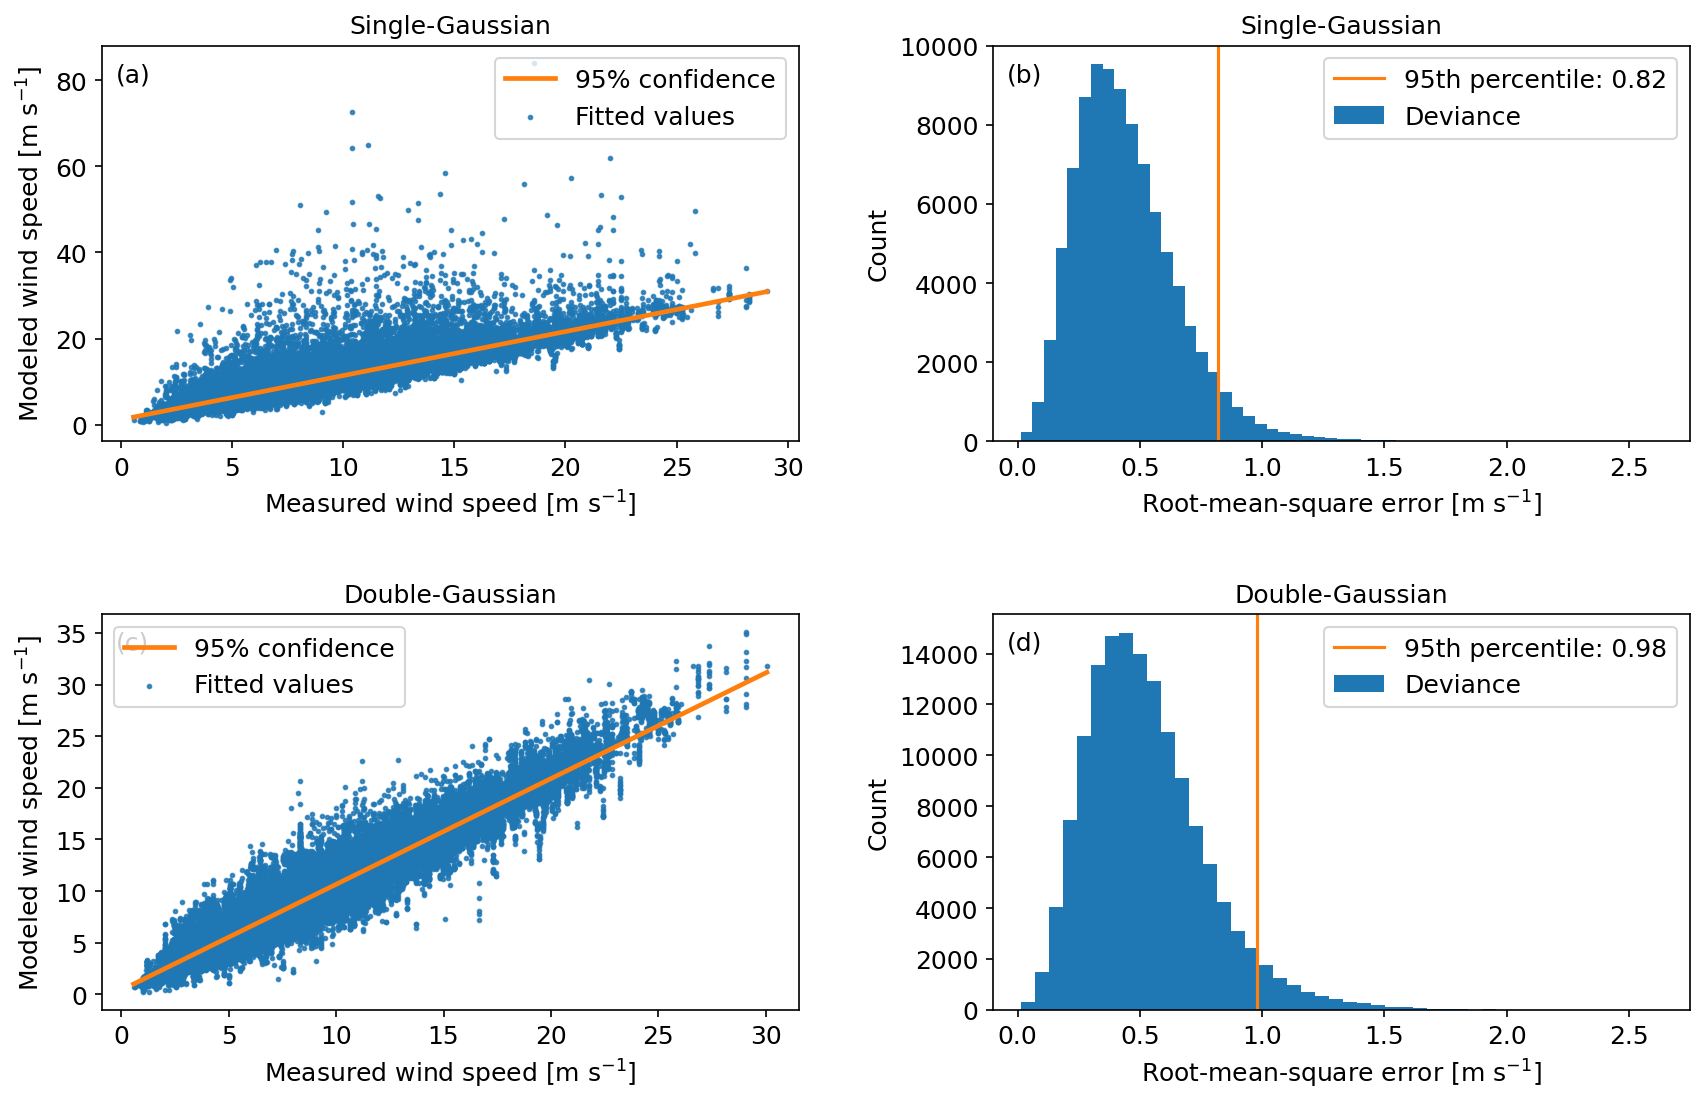

In [8]:
fig=plt.figure(figsize=(12,8), dpi=150)

ax=fig.add_subplot(221)
sns.regplot(x='ws_WC_80m', y='AWS', data=wake_Vr, ci=95, order=1, marker='.', scatter_kws={"color":"C0","s":12}, line_kws={"color":"C1","label":"95% confidence"}, label='Fitted values')
plt.title("Single-Gaussian",fontsize=12)
plt.xlabel('Measured wind speed [m s$^{-1}$]',fontsize=12)
plt.ylabel('Modeled wind speed [m s$^{-1}$]',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.text(.02,.91, '(a)',fontsize=12, transform=ax.transAxes)

ax=fig.add_subplot(222)
plt.hist(wake_Vr.RMSE_Vr,150, color="C0", label="Deviance")
plt.axvline(x=np.percentile(wake_Vr.RMSE_Vr, 95), color='C1', label=f'95th percentile: {np.round(np.percentile(wake_Vr.RMSE_Vr, 95), 2)}')
plt.legend(loc='best',fontsize=12)
plt.xlim(-0.1, 2.75)
# plt.ylim(0, 10000)
plt.title("Single-Gaussian",fontsize=12)
plt.xlabel('Root-mean-square error [m s$^{-1}$]',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.text(.02,.91, '(b)',fontsize=12, transform=ax.transAxes)

ax=fig.add_subplot(223)
sns.regplot(x='ws_WC_80m', y='AWS', data=wake_Va, ci=95, order=1, marker='.', scatter_kws={"color":"C0","s":12}, line_kws={"color":"C1","label":"95% confidence"}, label='Fitted values')
plt.title("Double-Gaussian",fontsize=12)
plt.xlabel('Measured wind speed [m s$^{-1}$]',fontsize=12)
plt.ylabel('Modeled wind speed [m s$^{-1}$]',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.text(.02,.91, '(c)',fontsize=12, transform=ax.transAxes)

ax=fig.add_subplot(224)
plt.hist(wake_Va.RMSE_Va,150, color="C0", label="Deviance")
plt.axvline(x=np.percentile(wake_Va.RMSE_Va, 95), color='C1', label=f'95th percentile: {np.round(np.percentile(wake_Va.RMSE_Va, 95), 2)}')
plt.legend(loc='best',fontsize=12)
plt.xlim(-0.1, 2.75)
# plt.ylim(0, 10000)
plt.title("Double-Gaussian",fontsize=12)
plt.xlabel('Root-mean-square error [m s$^{-1}$]',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.text(.02,.91, '(d)',fontsize=12, transform=ax.transAxes)

fig.tight_layout(pad=3)

file_name = path + '/Figures_Final_V1/curve_fit_error.pdf'
plt.savefig(file_name, bbox_inches='tight', format='pdf')

In [9]:
wake_Va

WD        WW        AWS          CL   RMSE_Va    Dif_Va  \
time  range                                                                   
0     0      13.433723  1.694267  16.877032 -147.123655  0.752016  0.370624   
2     0            NaN  1.556921   6.087824    1.314703  0.461859  0.259976   
      1            NaN  1.701770   5.969419   10.616821  0.421625  0.101300   
      2            NaN  1.972224   5.943891   16.899147  0.346334  0.058433   
7     0      25.990445  2.049516   3.725123   22.056274  0.117464  0.071638   
...                ...       ...        ...         ...       ...       ...   
85643 2            NaN  1.336823  14.417032   -5.344519  0.443775  0.101781   
85651 0            NaN  1.000368  14.487324   -8.850874  0.892869  0.547719   
      1            NaN  1.090223  14.548535   -9.845508  0.857743  0.284106   
85654 0            NaN  1.375606  15.203236   -8.348675  0.812000  0.126232   
85669 0            NaN  0.937310  13.358651  -20.386196  1.095760  0.123122   

             Diff Max  ws_WC_80m     ws_60m   wd_WC_80m      wd_60m  \
time  range                                                           
0     0      2.280058  15.223402  14.416003  324.189485  326.640333   
2     0      1.040604        NaN   4.037622         NaN  263.180088   
      1      1.040604        NaN   4.037622         NaN  263.180088   
      2      1.040604        NaN   4.037622         NaN  263.180088   
7     0      0.118172   3.063867   2.888928  281.185229  234.084565   
...               ...        ...        ...         ...         ...   
85643 2      0.488411        NaN        NaN         NaN         NaN   
85651 0      1.001214        NaN        NaN         NaN         NaN   
      1      1.001214        NaN        NaN         NaN         NaN   
85654 0      1.314331        NaN        NaN         NaN         NaN   
85669 0      1.063205        NaN        NaN         NaN         NaN   

             yaw_offset_mean_target  yaw_offset_std_target  yaw_vane_mean  \
time  range                                                                 
0     0                         NaN                    NaN            NaN   
2     0                         NaN                    NaN            NaN   
      1                         NaN                    NaN            NaN   
      2                         NaN                    NaN            NaN   
7     0                         NaN                    NaN            NaN   
...                             ...                    ...            ...   
85643 2               9.881313e-324                    NaN       1.227675   
85651 0               9.881313e-324                    NaN       1.227675   
      1               9.881313e-324                    NaN       1.227675   
85654 0               9.881313e-324                    NaN       1.227675   
85669 0               9.881313e-324                    NaN       1.227675   

             yaw_vane_std  steering_status  Obukhov_length_10m     TI_60m  
time  range                                                                
0     0               NaN              NaN           75.486098  12.572836  
2     0               NaN              NaN         -493.292437  36.082825  
      1               NaN              NaN         -493.292437  36.082825  
      2               NaN              NaN         -493.292437  36.082825  
7     0               NaN              NaN          129.814888  25.951070  
...                   ...              ...                 ...        ...  
85643 2               NaN              0.0          389.551932        NaN  
85651 0               NaN              0.0          389.551932        NaN  
      1               NaN              0.0          389.551932        NaN  
85654 0               NaN              0.0          389.551932        NaN  
85669 0               NaN              1.0          389.551932        NaN  

[143592 rows x 18 columns]

## Add other columns and then apply QC needed

In [10]:
a_rmse_Va=np.percentile(wake_Va.RMSE_Va,95)
a_rmse_Vr=np.percentile(wake_Vr.RMSE_Vr,95)

wake_Va=wake_Va.loc[(wake_Va['wd_WC_80m'] > 280)  | (wake_Va['wd_WC_80m'] < 60)]
wake_Vr=wake_Vr.loc[(wake_Vr['wd_WC_80m'] > 280)  | (wake_Vr['wd_WC_80m'] < 60)]

wake_Va['AWS_diff']= np.abs(wake_Va['ws_WC_80m']-wake_Va['AWS'])/wake_Va['ws_WC_80m']*100
wake_Vr['AWS_diff']= np.abs(wake_Vr['ws_WC_80m']-wake_Vr['AWS'])/wake_Vr['ws_WC_80m']*100
wake_Va=wake_Va.loc[(wake_Va['AWS_diff'] < 25) ]
wake_Vr=wake_Vr.loc[(wake_Vr['AWS_diff'] < 25) ]

wake_Va=wake_Va.loc[(wake_Va['RMSE_Va'] < a_rmse_Va) ]
wake_Vr=wake_Vr.loc[(wake_Vr['RMSE_Vr'] < a_rmse_Vr) ]

n=len(wake_Va['WD'].unstack().mean())
WD_Va_mean=wake_Va['WD'].unstack().mean()
WD_Va_std=wake_Va['WD'].unstack().std()
WD_Va_median=wake_Va['WD'].unstack().median()

n=len(wake_Vr['WD'].unstack().mean())
WD_Vr_mean=wake_Vr['WD'].unstack().mean()
WD_Vr_std=wake_Vr['WD'].unstack().std()
WD_Vr_median=wake_Vr['WD'].unstack().median()

WW_Va_mean=wake_Va['WW'].unstack().mean()
WW_Va_std=wake_Va['WW'].unstack().std()
WW_Va_median=wake_Va['WW'].unstack().median()

WW_Vr_mean=wake_Vr['WW'].unstack().mean()
WW_Vr_std=wake_Vr['WW'].unstack().std()
WW_Vr_median=wake_Vr['WW'].unstack().median()

CL_Va_mean=wake_Va['CL'].unstack().mean()
CL_Va_std=wake_Va['CL'].unstack().std()
CL_Va_median=wake_Va['CL'].unstack().median()

CL_Vr_mean=wake_Vr['CL'].unstack().mean()
CL_Vr_std=wake_Vr['CL'].unstack().std()
CL_Vr_median=wake_Vr['CL'].unstack().median()

nrange2 = post_QC_data['nrange2']
rotor_diameter = 77
Rd = np.array([x/(-77) for x in nrange2])

D=77.
n=int(12)

wake_Va['zL']=10/wake_Va.Obukhov_length_10m
index=(wake_Va['zL'] < -2) | (wake_Va['zL'] > 2)
wake_Va.zL[index]=np.nan

wake_Vr['zL']=10/wake_Vr.Obukhov_length_10m
index=(wake_Vr['zL'] < -2) | (wake_Vr['zL'] > 2)
wake_Vr.zL[index]=np.nan

label_sidechain = WD_Va_mean*np.nan

/pl/active/courses/2020_fall/ATOC_BLM/software/anaconda/envs/tutorial_2020/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


## Further Classification

In [11]:
### Vr (single-gaussian)

unyawed=(wake_Vr['yaw_vane_std'] < 10) & (wake_Vr['steering_status'] <0.1) & ((wake_Vr['yaw_vane_mean'] > -2) & (wake_Vr['yaw_vane_mean'] <2))
yawed=(wake_Vr['yaw_vane_std'] < 10) & (wake_Vr['steering_status'] > 0.1) & (((wake_Vr['yaw_vane_mean'] > 2) & (wake_Vr['yaw_vane_mean'] < 20)) | ((wake_Vr['yaw_vane_mean'] < -2) & (wake_Vr['yaw_vane_mean'] > -20)))

Region_all= ((wake_Vr['ws_WC_80m'] >= 2.5) & (wake_Vr['ws_WC_80m'] < 25))
Region2=((wake_Vr['ws_WC_80m'] >= 2.5) & (wake_Vr['ws_WC_80m'] < 9))
Region2p5=(wake_Vr['ws_WC_80m'] >= 9) & (wake_Vr['ws_WC_80m'] < 14)
Region3=(wake_Vr['ws_WC_80m'] >= 14) & (wake_Vr['ws_WC_80m'] < 25)

stable=(wake_Vr['zL'] > 0.01)
unstable=(wake_Vr['zL'] < -0.01)
neutral=((wake_Vr['zL'] < 0.01) & (wake_Vr['zL'] > -0.01))

lowTI=(wake_Vr['TI_60m'] <8)
highTI=(wake_Vr['TI_60m'] >8)



### Va (double-gaussian)

_unyawed=(wake_Va['yaw_vane_std'] < 10) & (wake_Va['steering_status'] <0.1) & ((wake_Va['yaw_vane_mean'] > -2) & (wake_Va['yaw_vane_mean'] <2))
_yawed=(wake_Va['yaw_vane_std'] < 10) & (wake_Va['steering_status'] > 0.1) & (((wake_Va['yaw_vane_mean'] > 2) & (wake_Va['yaw_vane_mean'] < 20)) | ((wake_Va['yaw_vane_mean'] < -2) & (wake_Va['yaw_vane_mean'] > -20)))

_Region_all= ((wake_Va['ws_WC_80m'] >= 2.5) & (wake_Va['ws_WC_80m'] < 25))
_Region2=((wake_Va['ws_WC_80m'] >= 2.5) & (wake_Va['ws_WC_80m'] < 9))
_Region2p5=(wake_Va['ws_WC_80m'] >= 9) & (wake_Va['ws_WC_80m'] < 14)
_Region3=(wake_Va['ws_WC_80m'] >= 14) & (wake_Va['ws_WC_80m'] < 25)

_stable=(wake_Va['zL'] > 0.01)
_unstable=(wake_Va['zL'] < -0.01)
_neutral=((wake_Va['zL'] < 0.01) & (wake_Va['zL'] > -0.01))

_lowTI=(wake_Va['TI_60m'] <8)
_highTI=(wake_Va['TI_60m'] >8)

## Plots

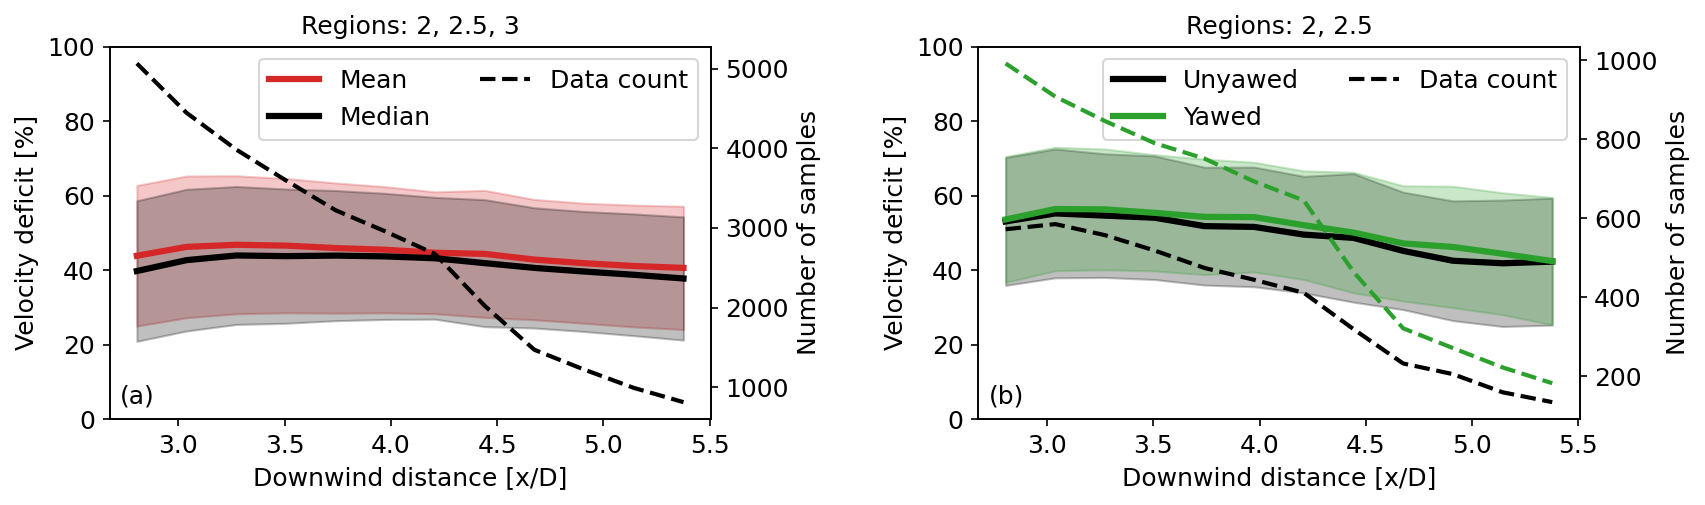

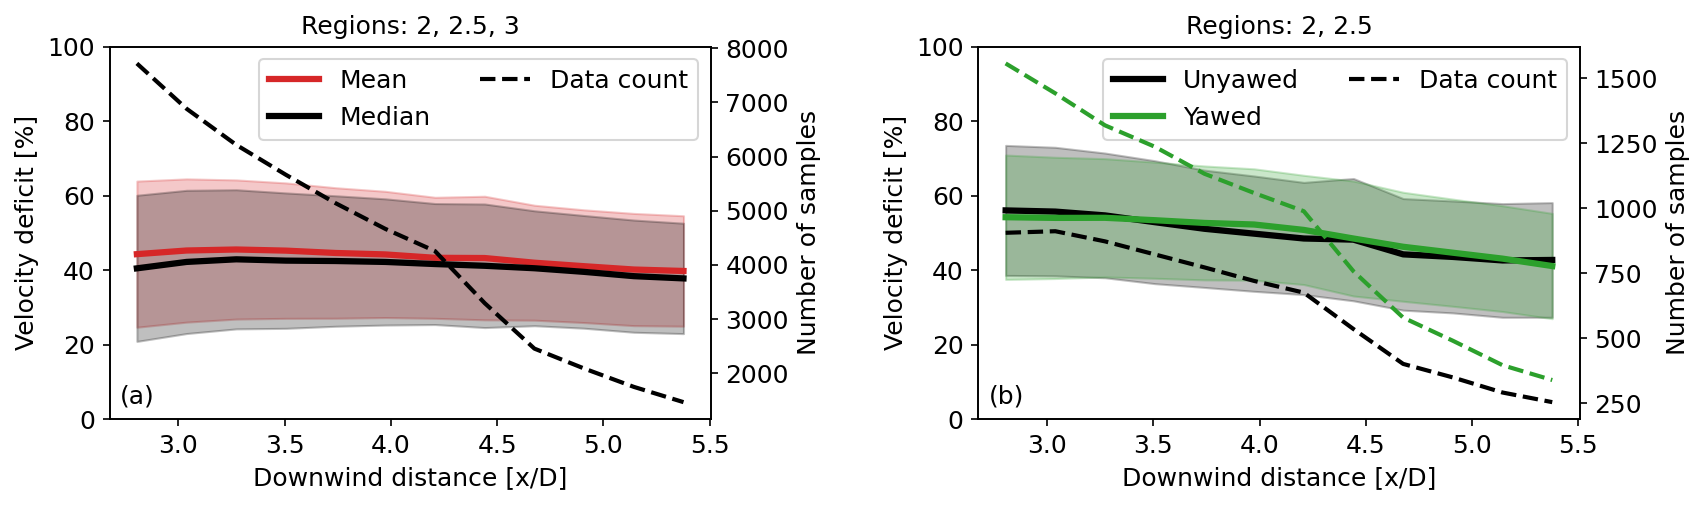

In [12]:
### Single-Gaussian

fig=plt.figure(figsize=(12,4), dpi=150)

ax1=fig.add_subplot(121)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[Region_all].WD.unstack().mean(), fmt='-', lw=3, color="C3", label="Mean")
ax1.fill_between(Rd[0:n], wake_Vr[Region_all].WD.unstack().mean()-wake_Vr[Region_all].WD.unstack().std(), wake_Vr[Region_all].WD.unstack().mean()+wake_Vr[Region_all].WD.unstack().std(), color='C3', alpha=0.25)
ax1.errorbar(Rd[0:n], wake_Vr[Region_all].WD.unstack().median(), fmt='-', lw=3, color='black', label="Median")
ax1.fill_between(Rd[0:n], wake_Vr[Region_all].WD.unstack().median()-wake_Vr[Region_all].WD.unstack().std(), wake_Vr[Region_all].WD.unstack().median()+wake_Vr[Region_all].WD.unstack().std(), color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[Region_all].WD.unstack().count(), fmt='--', lw=2, color='black')
ax1.errorbar(Rd[0:n], label_sidechain, label='Data count', fmt='--', lw=2, color='black')
ax1.set_title("Regions: 2, 2.5, 3",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.legend(loc='best',ncol=2,fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.018,0.042,'(a)',fontsize=12,transform=ax1.transAxes)

ax1=fig.add_subplot(122)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].WD.unstack().median(), fmt='-', lw=3, color="black", label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].WD.unstack().median()-wake_Vr[unyawed&Region2+Region2p5].WD.unstack().std(), wake_Vr[unyawed&Region2+Region2p5].WD.unstack().median()+wake_Vr[unyawed&Region2+Region2p5].WD.unstack().std(), color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].WD.unstack().count(), fmt='--', lw=2, color='black')
ax1.errorbar(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].WD.unstack().median(), fmt='-', lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].WD.unstack().median()-wake_Vr[yawed&Region2+Region2p5].WD.unstack().std(), wake_Vr[yawed&Region2+Region2p5].WD.unstack().median()+wake_Vr[yawed&Region2+Region2p5].WD.unstack().std(), color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].WD.unstack().count(), fmt='--', lw=2, color='C2')
ax1.errorbar(Rd[0:n], label_sidechain, label='Data count', fmt='--', lw=2, color='black')
# ax1.errorbar(Rd[0:n], label_sidechain, label='Yawed data points', fmt='--', lw=2, color='C2')
ax1.set_title("Regions: 2, 2.5",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.legend(loc='best',ncol=2,fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.018,0.042,'(b)',fontsize=12,transform=ax1.transAxes)

fig.tight_layout(pad=3)

# file_name = path + '/Figures_Final_V1/mean_median.pdf'
# plt.savefig(file_name, bbox_inches='tight', format='pdf')



### Double-Gaussian

fig=plt.figure(figsize=(12,4), dpi=150)

ax1=fig.add_subplot(121)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Va[_Region_all].WD.unstack().mean(), fmt='-', lw=3, color="C3", label="Mean")
ax1.fill_between(Rd[0:n], wake_Va[_Region_all].WD.unstack().mean()-wake_Va[_Region_all].WD.unstack().std(), wake_Va[_Region_all].WD.unstack().mean()+wake_Va[_Region_all].WD.unstack().std(), color='C3', alpha=0.25)
ax1.errorbar(Rd[0:n], wake_Va[_Region_all].WD.unstack().median(), fmt='-', lw=3, color='black', label="Median")
ax1.fill_between(Rd[0:n], wake_Va[_Region_all].WD.unstack().median()-wake_Va[_Region_all].WD.unstack().std(), wake_Va[_Region_all].WD.unstack().median()+wake_Va[_Region_all].WD.unstack().std(), color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Va[_Region_all].WD.unstack().count(), fmt='--', lw=2, color='black')
ax1.errorbar(Rd[0:n], label_sidechain, label='Data count', fmt='--', lw=2, color='black')
ax1.set_title("Regions: 2, 2.5, 3",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.legend(loc='best',ncol=2,fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.018,0.042,'(a)',fontsize=12,transform=ax1.transAxes)

ax1=fig.add_subplot(122)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Va[_unyawed&_Region2+_Region2p5].WD.unstack().median(), fmt='-', lw=3, color="black", label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Va[_unyawed&_Region2+_Region2p5].WD.unstack().median()-wake_Va[_unyawed&_Region2+_Region2p5].WD.unstack().std(), wake_Va[_unyawed&_Region2+_Region2p5].WD.unstack().median()+wake_Va[_unyawed&_Region2+_Region2p5].WD.unstack().std(), color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Va[_unyawed&_Region2+_Region2p5].WD.unstack().count(), fmt='--', lw=2, color='black')
ax1.errorbar(Rd[0:n], wake_Va[_yawed&_Region2+_Region2p5].WD.unstack().median(), fmt='-', lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Va[_yawed&_Region2+_Region2p5].WD.unstack().median()-wake_Va[_yawed&_Region2+_Region2p5].WD.unstack().std(), wake_Va[_yawed&_Region2+_Region2p5].WD.unstack().median()+wake_Va[_yawed&_Region2+_Region2p5].WD.unstack().std(), color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Va[_yawed&_Region2+_Region2p5].WD.unstack().count(), fmt='--', lw=2, color='C2')
ax1.errorbar(Rd[0:n], label_sidechain, label='Data count', fmt='--', lw=2, color='black')
# ax1.errorbar(Rd[0:n], label_sidechain, label='Yawed data points', fmt='--', lw=2, color='C2')
ax1.set_title("Regions: 2, 2.5",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.legend(loc='best',ncol=2,fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.018,0.042,'(b)',fontsize=12,transform=ax1.transAxes)

fig.tight_layout(pad=3)

# file_name = path + '/Figures_Final_V1/mean_median.pdf'
# plt.savefig(file_name, bbox_inches='tight', format='pdf')

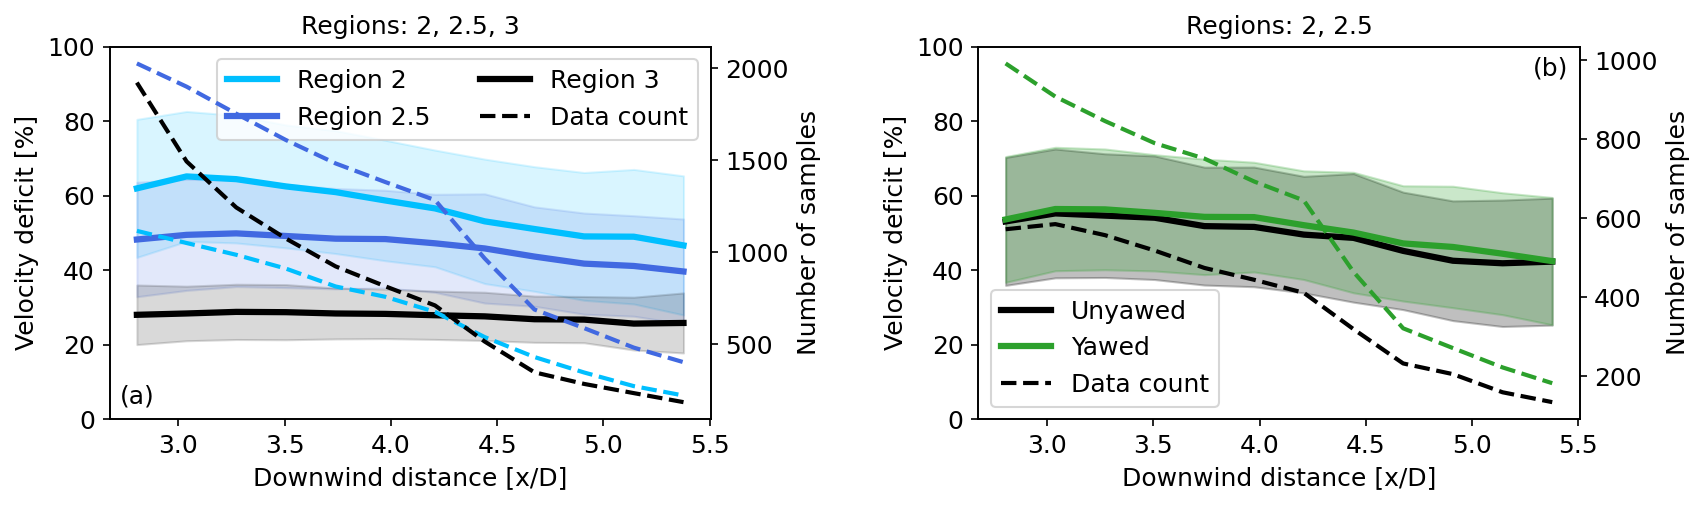

In [13]:
fig=plt.figure(figsize=(12,4), dpi=150)

ax1=fig.add_subplot(121)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[Region2].WD.unstack().median(), lw=3, fmt='-', color="deepskyblue", label="Region 2")
ax1.fill_between(Rd[0:n], wake_Vr[Region2].WD.unstack().median()-wake_Vr[Region2].WD.unstack().std(), wake_Vr[Region2].WD.unstack().median()+wake_Vr[Region2].WD.unstack().std(), color='deepskyblue', alpha=0.15)
ax1.errorbar(Rd[0:n], wake_Vr[Region2p5].WD.unstack().median(), lw=3, fmt='-', color="royalblue", label="Region 2.5")
ax1.fill_between(Rd[0:n], wake_Vr[Region2p5].WD.unstack().median()-wake_Vr[Region2p5].WD.unstack().std(), wake_Vr[Region2p5].WD.unstack().median()+wake_Vr[Region2p5].WD.unstack().std(), color='royalblue', alpha=0.15)
ax1.errorbar(Rd[0:n], wake_Vr[Region3].WD.unstack().median(), lw=3, fmt='-', color="black", label="Region 3")
ax1.fill_between(Rd[0:n], wake_Vr[Region3].WD.unstack().median()-wake_Vr[Region3].WD.unstack().std(), wake_Vr[Region3].WD.unstack().median()+wake_Vr[Region3].WD.unstack().std(), color='black', alpha=0.15)
ax2.errorbar(Rd[0:n], wake_Vr[Region2].WD.unstack().count(), fmt='--', lw=2, color='deepskyblue', label="Region2")
ax2.errorbar(Rd[0:n], wake_Vr[Region2p5].WD.unstack().count(), fmt='--', lw=2, color='royalblue',  label="Region2.5")
ax2.errorbar(Rd[0:n], wake_Vr[Region3].WD.unstack().count(), fmt='--', lw=2, color='black',  label="Region3")
# ax1.errorbar(Rd[0:n], label_sidechain, label='Data points', fmt='--', lw=2, color='deepskyblue')
# ax1.errorbar(Rd[0:n], label_sidechain, label='Data points', fmt='--', lw=2, color='royalblue')
ax1.errorbar(Rd[0:n], label_sidechain, label='Data count', fmt='--', lw=2, color='black')
ax1.set_title("Regions: 2, 2.5, 3",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.legend(loc='best',ncol=2,fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.018,0.042,'(a)',fontsize=12,transform=ax1.transAxes)

ax1=fig.add_subplot(122)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].WD.unstack().median(), fmt='-', lw=3, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].WD.unstack().median()-wake_Vr[unyawed&Region2+Region2p5].WD.unstack().std(), wake_Vr[unyawed&Region2+Region2p5].WD.unstack().median()+wake_Vr[unyawed&Region2+Region2p5].WD.unstack().std(), color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].WD.unstack().count(), fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].WD.unstack().median(), fmt='-', lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].WD.unstack().median()-wake_Vr[yawed&Region2+Region2p5].WD.unstack().std(), wake_Vr[yawed&Region2+Region2p5].WD.unstack().median()+wake_Vr[yawed&Region2+Region2p5].WD.unstack().std(), color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].WD.unstack().count(), fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Data count")
# ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='C2', label="Yawed data points")
ax1.legend(loc='lower left',ncol=1,fontsize=12)
ax1.set_title("Regions: 2, 2.5",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.922,0.922,'(b)',fontsize=12,transform=ax1.transAxes)

fig.tight_layout(pad=3)

file_name = path + '/Figures_Final_V1/region_separation.pdf'
plt.savefig(file_name, bbox_inches='tight', format='pdf')

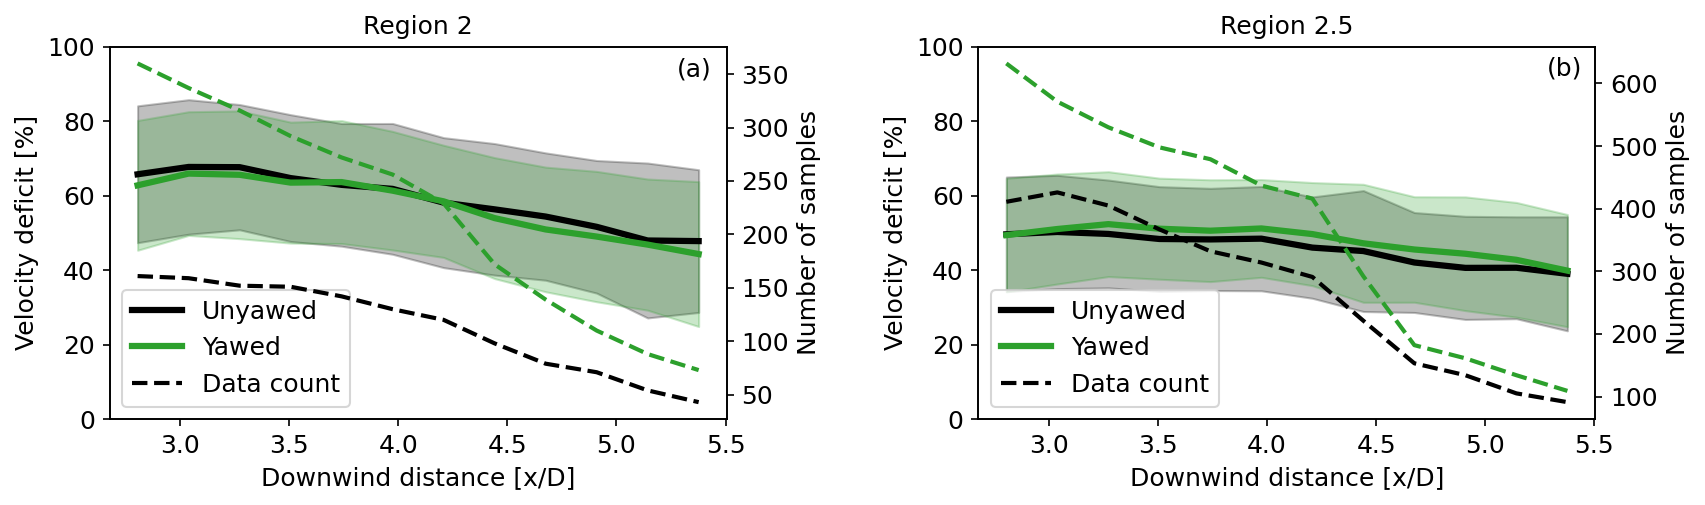

In [54]:
fig=plt.figure(figsize=(12,4), dpi=150)

ax1=fig.add_subplot(121)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[unyawed&Region2].WD.unstack().median(), fmt='-', lw=3, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[unyawed&Region2].WD.unstack().median()-wake_Vr[unyawed&Region2].WD.unstack().std(), wake_Vr[unyawed&Region2].WD.unstack().median()+wake_Vr[unyawed&Region2].WD.unstack().std(), color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[unyawed&Region2].WD.unstack().count(), fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[yawed&Region2].WD.unstack().median(), fmt='-', lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[yawed&Region2].WD.unstack().median()-wake_Vr[yawed&Region2].WD.unstack().std(), wake_Vr[yawed&Region2].WD.unstack().median()+wake_Vr[yawed&Region2].WD.unstack().std(), color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[yawed&Region2].WD.unstack().count(), fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Data count")
# ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='C2', label="Yawed data points")
ax1.legend(loc='lower left',ncol=1,fontsize=12)
ax1.set_title("Region 2",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.92,0.92, '(a)',fontsize=12,transform=ax1.transAxes)

ax1=fig.add_subplot(122)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[unyawed&Region2p5].WD.unstack().median(), fmt='-', lw=3, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[unyawed&Region2p5].WD.unstack().median()-wake_Vr[unyawed&Region2p5].WD.unstack().std(), wake_Vr[unyawed&Region2p5].WD.unstack().median()+wake_Vr[unyawed&Region2p5].WD.unstack().std(), color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[unyawed&Region2p5].WD.unstack().count(), fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[yawed&Region2p5].WD.unstack().median(), fmt='-', lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[yawed&Region2p5].WD.unstack().median()-wake_Vr[yawed&Region2p5].WD.unstack().std(), wake_Vr[yawed&Region2p5].WD.unstack().median()+wake_Vr[yawed&Region2p5].WD.unstack().std(), color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[yawed&Region2p5].WD.unstack().count(), fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Data count")
# ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='C2', label="Yawed data points")
ax1.legend(loc='lower left',ncol=1,fontsize=12)
ax1.set_title("Region 2.5",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.922,0.922,'(b)',fontsize=12,transform=ax1.transAxes)

fig.tight_layout(pad=3)

file_name = path + '/Figures_Final_V1/region_separation_yawed_unyawed.pdf'
plt.savefig(file_name, bbox_inches='tight', format='pdf')

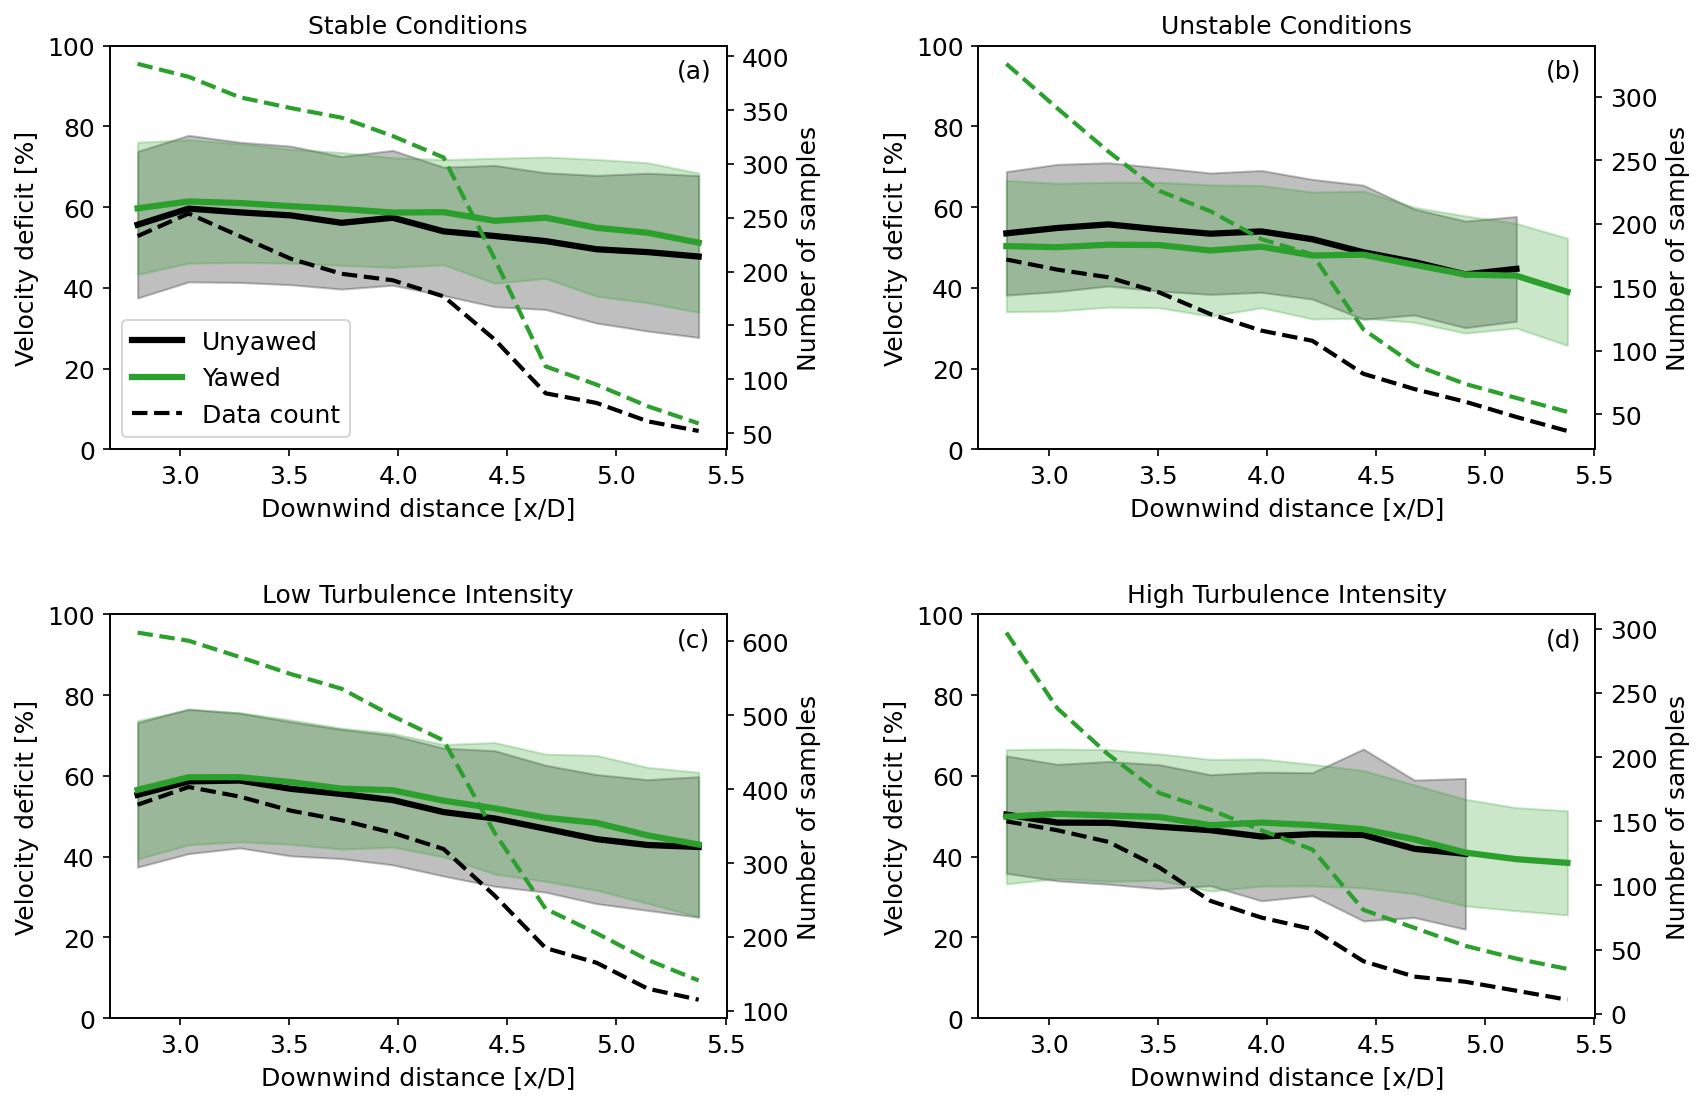

In [47]:
fig=plt.figure(figsize=(12,8), dpi=150)

ax1=fig.add_subplot(221)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[stable&unyawed&Region2+Region2p5].WD.unstack().median(), lw=3, fmt='-', color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[stable&unyawed&Region2+Region2p5].WD.unstack().median()-wake_Vr[stable&unyawed&Region2+Region2p5].WD.unstack().std(), wake_Vr[stable&unyawed&Region2+Region2p5].WD.unstack().median()+wake_Vr[stable&unyawed&Region2+Region2p5].WD.unstack().std(), color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[stable&unyawed&Region2+Region2p5].WD.unstack().count(), fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[stable&yawed&Region2+Region2p5].WD.unstack().median()[0:n],lw=3, fmt='-',color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[stable&yawed&Region2+Region2p5].WD.unstack().median()[0:n]-wake_Vr[stable&yawed&Region2+Region2p5].WD.unstack().std()[0:n], wake_Vr[stable&yawed&Region2+Region2p5].WD.unstack().median()[0:n]+wake_Vr[stable&yawed&Region2+Region2p5].WD.unstack().std()[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[stable&yawed&Region2+Region2p5].WD.unstack().count()[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Data count")
# ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='C2', label="Yawed data points")
ax1.set_title("Stable Conditions",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.legend(loc='lower left',ncol=1,fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.92,0.92, '(a)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(222)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n-1], wake_Vr[unstable&unyawed&Region2+Region2p5].WD.unstack().median()[0:n-1], lw=3, fmt='-', color='black', label="Unyawed")
ax1.fill_between(Rd[0:n-1], wake_Vr[unstable&unyawed&Region2+Region2p5].WD.unstack().median()[0:n-1]-wake_Vr[unstable&unyawed&Region2+Region2p5].WD.unstack().std()[0:n-1], wake_Vr[unstable&unyawed&Region2+Region2p5].WD.unstack().median()[0:n-1]+wake_Vr[unstable&unyawed&Region2+Region2p5].WD.unstack().std()[0:n-1], color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[unstable&unyawed&Region2+Region2p5].WD.unstack().count(), fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[unstable&yawed&Region2+Region2p5].WD.unstack().median()[0:n], lw=3, fmt='-',color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[unstable&yawed&Region2+Region2p5].WD.unstack().median()[0:n]-wake_Vr[unstable&yawed&Region2+Region2p5].WD.unstack().std()[0:n], wake_Vr[unstable&yawed&Region2+Region2p5].WD.unstack().median()[0:n]+wake_Vr[unstable&yawed&Region2+Region2p5].WD.unstack().std()[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[unstable&yawed&Region2+Region2p5].WD.unstack().count(), fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Unyawed data points")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',lw=2, color='C2', label="Yawed data points")
ax1.set_title("Unstable Conditions",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.92,0.92, '(b)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(223)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[lowTI&unyawed&Region2+Region2p5].WD.unstack().median()[0:n], fmt='-', lw=3, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[lowTI&unyawed&Region2+Region2p5].WD.unstack().median()[0:n]-wake_Vr[lowTI&unyawed&Region2+Region2p5].WD.unstack().std()[0:n], wake_Vr[lowTI&unyawed&Region2+Region2p5].WD.unstack().median()[0:n]+wake_Vr[lowTI&unyawed&Region2+Region2p5].WD.unstack().std()[0:n], color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[lowTI&unyawed&Region2+Region2p5].WD.unstack().count()[0:n], fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[lowTI&yawed&Region2+Region2p5].WD.unstack().median()[0:n], fmt='-', lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[lowTI&yawed&Region2+Region2p5].WD.unstack().median()[0:n]-wake_Vr[lowTI&yawed&Region2+Region2p5].WD.unstack().std()[0:n], wake_Vr[lowTI&yawed&Region2+Region2p5].WD.unstack().median()[0:n]+wake_Vr[lowTI&yawed&Region2+Region2p5].WD.unstack().std()[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[lowTI&yawed&Region2+Region2p5].WD.unstack().count()[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='black', label="Unyawed data points")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='C2', label="Yawed data points")
ax1.set_title("Low Turbulence Intensity",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.92,0.92, '(c)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(224)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n-2], wake_Vr[highTI&unyawed&Region2+Region2p5].WD.unstack().median()[0:n-2], fmt='-', lw=3, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n-2], wake_Vr[highTI&unyawed&Region2+Region2p5].WD.unstack().median()[0:n-2]-wake_Vr[highTI&unyawed&Region2+Region2p5].WD.unstack().std()[0:n-2], wake_Vr[highTI&unyawed&Region2+Region2p5].WD.unstack().median()[0:n-2]+wake_Vr[highTI&unyawed&Region2+Region2p5].WD.unstack().std()[0:n-2], color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[highTI&unyawed&Region2+Region2p5].WD.unstack().count()[0:n], fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[highTI&yawed&Region2+Region2p5].WD.unstack().median()[0:n], fmt='-', lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[highTI&yawed&Region2+Region2p5].WD.unstack().median()[0:n]-wake_Vr[highTI&yawed&Region2+Region2p5].WD.unstack().std()[0:n], wake_Vr[highTI&yawed&Region2+Region2p5].WD.unstack().median()[0:n]+wake_Vr[highTI&yawed&Region2+Region2p5].WD.unstack().std()[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[highTI&yawed&Region2+Region2p5].WD.unstack().count()[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='black', label="Unyawed data points")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='C2', label="Yawed data points")
ax1.set_title("High Turbulence Intensity",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.92,0.92, '(d)',fontsize=12, transform=ax1.transAxes)

fig.tight_layout(pad=3)

file_name = path + '/Figures_Final_V1/yawed_unyawed_conditions.pdf'
plt.savefig(file_name, bbox_inches='tight', format='pdf')

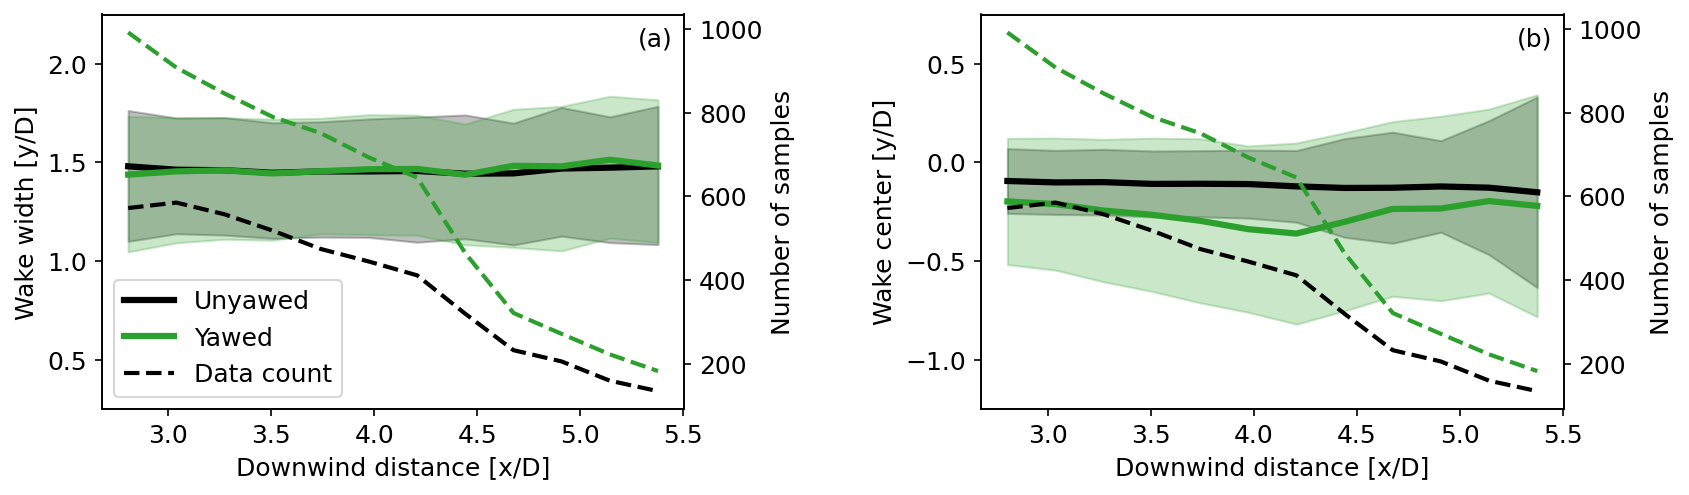

In [48]:
gamma=wake_Vr[yawed&Region2].yaw_vane_mean.median()
aa=0.6*np.sin(gamma*np.pi/180)/4*np.cos(gamma*np.pi/180)**2*(1-1/(1+2*Rd[0:n]))

fig=plt.figure(figsize=(12,4), dpi=150)

ax1=fig.add_subplot(121)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].WW.unstack().mean(), fmt='-',color='black',lw=3, label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].WW.unstack().median()-wake_Vr[unyawed&Region2+Region2p5].WW.unstack().std(), wake_Vr[unyawed&Region2+Region2p5].WW.unstack().median()+wake_Vr[unyawed&Region2+Region2p5].WW.unstack().std(), color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].WW.unstack().count(), fmt='--', lw=2, color='black')
ax1.errorbar(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].WW.unstack().mean()[0:n], fmt='-', color='C2',lw=3, label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].WW.unstack().median()[0:n]-wake_Vr[yawed&Region2+Region2p5].WW.unstack().std()[0:n], wake_Vr[yawed&Region2+Region2p5].WW.unstack().median()[0:n]+wake_Vr[yawed&Region2+Region2p5].WW.unstack().std()[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].WW.unstack().count(), fmt='--', lw=2, color='C2')
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Data count")
# ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='C2', label="Yawed data points")
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake width [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.legend(loc='lower left',ncol=1,fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0.25,2.25)
ax1.text(0.92,0.92, '(a)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(122)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].CL.unstack().median()/77, fmt='-', lw=3, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].CL.unstack().median()/77-wake_Vr[unyawed&Region2+Region2p5].CL.unstack().std()/77, wake_Vr[unyawed&Region2+Region2p5].CL.unstack().median()/77+wake_Vr[unyawed&Region2+Region2p5].CL.unstack().std()/77, color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].CL.unstack().count(), fmt='--', lw=2, color='black')
ax1.errorbar(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].CL.unstack().median()[0:n]/77, fmt='-', lw=3, color="C2", label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].CL.unstack().median()/77-wake_Vr[yawed&Region2+Region2p5].CL.unstack().std()/77, wake_Vr[yawed&Region2+Region2p5].CL.unstack().median()/77+wake_Vr[yawed&Region2+Region2p5].CL.unstack().std()/77, color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].CL.unstack().count(), fmt='--', lw=2, color='C2')
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Unyawed data points")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='C2', label="Yawed data points")
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake center [y/D]',fontsize=12)
ax2.set_ylabel('Data points',fontsize=12)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake center [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(-1.25,0.75)
ax1.text(0.92,0.92, '(b)',fontsize=12, transform=ax1.transAxes)

fig.tight_layout(pad=3)

file_name = path + '/Figures_Final_V1/yawed_unyawed_width.pdf'
plt.savefig(file_name, bbox_inches='tight', format='pdf')

In [132]:
# fig=plt.figure(figsize=(12,4), dpi=150)

# ax1=fig.add_subplot(121)
# plt.hist(wake_Vr['WD'][wake_Vr['zL']>0.02], color='C0', bins=100, orientation='horizontal', label="Stable")
# plt.hist(wake_Vr['WD'][wake_Vr['zL']<-0.02], color='C1', bins=100, orientation='horizontal', alpha=0.8, label="Unstable")
# ax1.set_ylabel("Velocity deficit [%]",fontsize=12)
# ax1.set_xlabel('Number of fitted values',fontsize=12)
# plt.legend(loc='best',fontsize=12)
# plt.ylim(0,100)

# ax1=fig.add_subplot(122)
# plt.hist(wake_Vr['WD'][wake_Vr['TI_60m']<8], color='C0', bins=100, orientation='horizontal', label="Low TI")
# plt.hist(wake_Vr['WD'][wake_Vr['TI_60m']>8], color='C1', bins=100, orientation='horizontal', alpha=0.8, label="High TI")
# ax1.set_ylabel("Velocity deficit [%]",fontsize=12)
# ax1.set_xlabel('Number of fitted values',fontsize=12)
# plt.legend(loc='best',fontsize=12)
# plt.ylim(0,100)
# # ax1.set_title("Velocity deficit at all down",fontsize=12)

# fig.tight_layout(pad=3)

# file_name = path + '/Figures_Final_V1/wd_ti_obk.pdf'
# plt.savefig(file_name, bbox_inches='tight', format='pdf')